### **Taller 7 -  Clasificadores**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez 

**1. clasificador no supervisado - Distancias Encadenadas (Single link)**

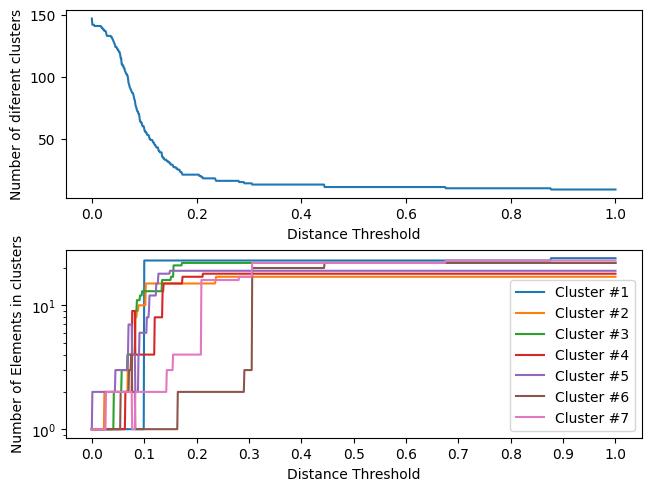

In [9]:
# Paso 1 - Carga de librerías y módulos necesarios
# Librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

import matplotlib.pyplot as plt

# Módulos


# Paso 2 - Lectura de datos y comprobación
df = pd.read_csv('data.csv')
df.describe().transpose()

# Paso 3 - Creación de arreglo de características y variable de respuesta
target_column = ['Clase']

predictors = list(set(list(df.columns))-set(target_column))  #Lista con todos los encabezados menos 'diabetes'
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

X = df[predictors].values
y = df[target_column].values

# 30% datos de prueba y 70% datos de entrenamiento
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

Points=1000
Threshold_Samples=np.linspace(0,1,Points)

Number_Diferent_Clusters=np.zeros(Points)
Number_Elements_n_Clusters=np.zeros((Points,7))
Element=0

for i in Threshold_Samples:
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None).fit(X_train)
    Cluster_Distribution=list(Counter(clustering.labels_).values())

    Number_Diferent_Clusters[Element]=len(Cluster_Distribution)

    if(len(Cluster_Distribution)<7):
        Number_Elements_n_Clusters[Element][:len(Cluster_Distribution)]=Cluster_Distribution
    else:
        Number_Elements_n_Clusters[Element][:]=Cluster_Distribution[:7]
    Element=Element+1


fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
my_xticks = np.linspace(0,1,11)
plt.xticks(my_xticks)

ax0.plot(Threshold_Samples, Number_Diferent_Clusters)
ax0.set_ylabel('Number of diferent clusters')
ax0.set_xlabel('Distance Threshold')


ax1.plot(Threshold_Samples, Number_Elements_n_Clusters)
ax1.set_ylabel('Number of Elements in clusters')
ax1.set_xlabel('Distance Threshold')
ax1.legend(['Cluster #1', 'Cluster #2','Cluster #3', 'Cluster #4','Cluster #5', 'Cluster #6','Cluster #7', 'Cluster #8'])
plt.yscale("log")

plt.show()


Al modificar el parámetro de decision del algoritmo (Umbral de distancia), cuando este se mantiene entre 0.67 y 0.77, existen 4 clases diferentes con un numero similar de elementos clasificados, siendo así un valor optimo para la clasificación según el algoritmo

**2. clasificador no supervisado - ISODATA**

Isodata(info): Starting algorithm with 1 classes
Isodata(info): Finished with 1 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 2 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 4
Isodata(info): Starting algorithm with 3 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 4 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 100
Isodata(info): Starting algorithm with 5 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 100
Isodata(info): Starting algorithm with 6 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 100
Isodata(info): Starting algorithm with 7 classes
Isodata(info): Finished with 2 classes
Isodata(info): Number of Iterations: 100
Isodata(info): Starting algorithm with 8 classes
Isodata(info): Finished with 2 classes
Isodata(info): 

c:\Users\yovan\Desktop\Universidad\2024-I\TIA\Tecnicas-de-IA---2024-I\Talleres\Taller 7\isodata.py:192: RuntimeWarning: invalid value encountered in scalar divide
  value /= count_per_cluster[cluster]


Isodata(info): Finished with 18 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 67 classes
Isodata(info): Finished with 18 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 68 classes
Isodata(info): Finished with 18 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 69 classes
Isodata(info): Finished with 19 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 70 classes
Isodata(info): Finished with 19 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 71 classes
Isodata(info): Finished with 19 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Starting algorithm with 72 classes
Isodata(info): Finished with 19 classes
Isodata(info): Number of Iterations: 5
Isodata(info): Starting algorithm with 73 classes
Isodata(info): Finished with 20 classes
Isodata(info): Number of Iterations: 2
Isodata(info): Sta

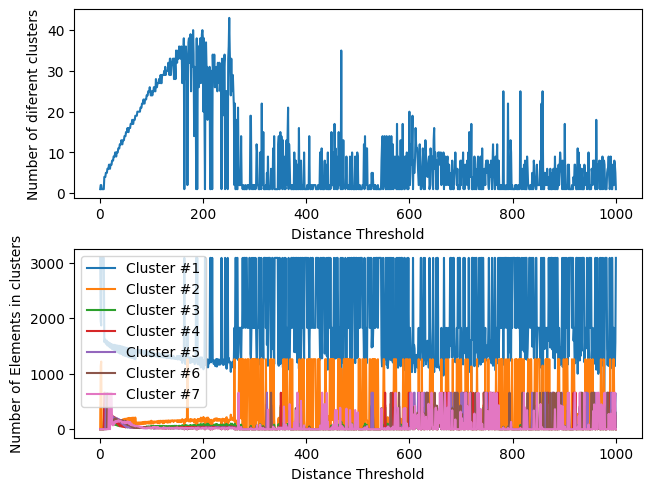

In [10]:
import isodata as iso
# run Isodata

Points=1000
Threshold_Samples=np.arange(1,Points+1,1)

Number_Diferent_Clusters=np.zeros(Points)
Number_Elements_n_Clusters=np.zeros((Points,7))
Element=0

for i in Threshold_Samples:

    params = {"K": i, "I" : 100, "P" : 2, "THETA_M" : 10, "THETA_S" : 0.1,    "THETA_C" : 2, "THETA_O" : 0.01}


    class_image = iso.isodata_classification(X_train, parameters=params)
    unique, counts = np.unique(class_image, return_counts=True)

    Number_Diferent_Clusters[Element]=len(unique)

    if(len(counts)<7):
        Number_Elements_n_Clusters[Element][:len(counts)]=counts
    else:
        Number_Elements_n_Clusters[Element][:]=counts[:7]
    Element=Element+1


fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')

ax0.plot(Threshold_Samples, Number_Diferent_Clusters)
ax0.set_ylabel('Number of diferent clusters')
ax0.set_xlabel('Distance Threshold')


ax1.plot(Threshold_Samples, Number_Elements_n_Clusters)
ax1.set_ylabel('Number of Elements in clusters')
ax1.set_xlabel('Distance Threshold')
ax1.legend(['Cluster #1', 'Cluster #2','Cluster #3', 'Cluster #4','Cluster #5', 'Cluster #6','Cluster #7', 'Cluster #8'])

plt.show()



**3. clasificador no supervisado - Kmeans**

c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (142) found smaller than n_clusters (143). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (142) found smaller than n_clusters (144). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (142) found smaller than n_clusters (145). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (142) found smaller than n_clusters (1

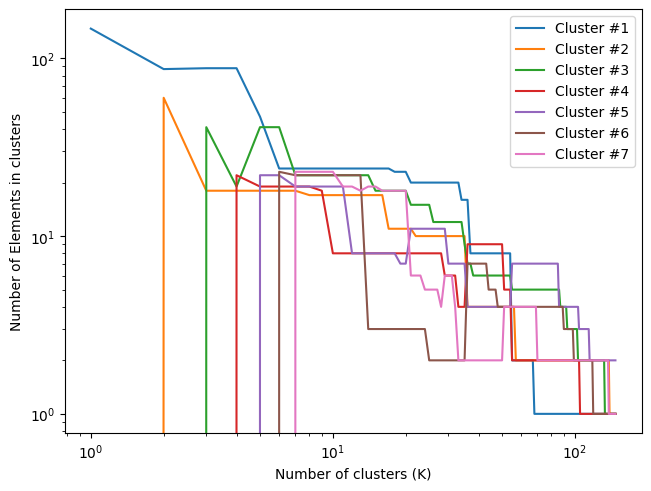

In [11]:
from sklearn.cluster import KMeans

Points=X_train.shape[0]
Threshold_Samples=np.arange(1,Points+1,1)

Number_Diferent_Clusters=np.zeros(Points)
Number_Elements_n_Clusters=np.zeros((Points,7))
Element=0

for i in Threshold_Samples:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(X_train)
    Cluster_Distribution=list(Counter(kmeans.labels_).values())

    Number_Diferent_Clusters[Element]=len(Cluster_Distribution)

    if(len(Cluster_Distribution)<7):
        Number_Elements_n_Clusters[Element][:len(Cluster_Distribution)]=Cluster_Distribution
    else:
        Number_Elements_n_Clusters[Element][:]=Cluster_Distribution[:7]
    Element=Element+1


fig, (ax0) = plt.subplots(1, 1, layout='constrained')




ax0.plot(Threshold_Samples, Number_Elements_n_Clusters)
ax0.set_ylabel('Number of Elements in clusters')
ax0.set_xlabel('Number of clusters (K)')
ax0.legend(['Cluster #1', 'Cluster #2','Cluster #3', 'Cluster #4','Cluster #5', 'Cluster #6','Cluster #7', 'Cluster #8'])
plt.yscale("log")
plt.xscale("log")

plt.show()



**3. clasificador supervisado**

***a. Clasificador Bayesiano***

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# 30% datos de prueba y 70% datos de entrenamiento
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)


clf = GaussianNB()
clf.fit(X_train, Y_train)


predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Resultados de entrenamiento
# print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

# Resultados de prueba
# print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        24

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       1.00 

c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***b. K-Vecinos más cercanos***

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix


# 30% datos de prueba y 70% datos de entrenamiento
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)


neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, Y_train)


predict_train = neigh.predict(X_train)
predict_test = neigh.predict(X_test)

# Resultados de entrenamiento
# print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

# Resultados de prueba
# print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        24

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       1.00 

c:\Users\yovan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
